<a href="https://colab.research.google.com/github/gabrielvinicios02/ExperimentsMultivariate/blob/main/Final_Thesis_Chapter_4_Probabilistic_Weighted_FTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scalable Models Of Probabilistic Forecasting For Fuzzy Time Series - Experiments of Chapter 4


<center>
<table><tr>
  
  <td> <a href="http://ufmg.br/"><img src="https://github.com/petroniocandido/PhdThesis/raw/master/figures/ufmg.jpg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
  <td> <a href="http://www.ifnmg.edu.br/"><img src="https://github.com/petroniocandido/PhdThesis/raw/master/figures/ifnmg.jpg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
  <td> <a href="http://www.minds.eng.ufmg.br/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/minds_logo_medium.jpeg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 
</tr>
</table>
</center>


* **Author**: Petrônio Cândido de  Lima e Silva  <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (SILVA, P.C.L)
* **Advisor**: Frederico Gadelha Guimarães <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0001-9238-8839" href="https://orcid.org/0000-0001-9238-8839" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (GUIMARÃES, F. G)
* **Co-Advisor**: Hossein Javedani Sadaei  <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-0848-9280" href="https://orcid.org/0000-0002-0848-9280" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (SADAEI, H. J.)

This notebook is part of [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.3374641.svg)](https://doi.org/10.5281/zenodo.3374641). You can execute it on-line with the Google Colab tool at http://bit.ly/scalable_probabilistic_fts_chap4

In case you have any questions, do not hesitate in contact us using the following e-mail: petronio.candido@ifnmg.edu.br

<center>
<table><tr>
  
  <td>Powered by </td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
<td><a href="https://pyfts.github.io/pyFTS/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/logo_medium.png" alt="pyFTS - Fuzzy Time Series for Python" width="100"/></a></td>
</tr>
</table>
</center>



## Library Installation

In [ ]:
# Requirements: Python 3.6
# The command below install the exact version of pyFTS library employed in the experiments
!pip3 install -U pyFTS 
!pip install git+https://github.com/RJT1990/pyflux
!git clone https://github.com/petroniocandido/stac


     |████████████████████████████████| 175 kB 5.3 MB/s 
  Cloning https://github.com/RJT1990/pyflux to /tmp/pip-req-build-6fnmo7cu
  Running command git clone -q https://github.com/RJT1990/pyflux /tmp/pip-req-build-6fnmo7cu
     |████████████████████████████████| 99 kB 4.0 MB/s 
     |████████████████████████████████| 189 kB 16.1 MB/s 
  Created wheel for pyflux: filename=pyflux-0.4.17-cp37-cp37m-linux_x86_64.whl size=5271887 sha256=850d4f26e6f9a355b9114c4a23a8c16e66d509dfe5d35ebc03196df9608e9bd1
  Stored in directory: /tmp/pip-ephem-wheel-cache-ypvf2c8v/wheels/96/8f/9c/4523f6aab114103428254ec8f7260d52bffaa1ea1add77a487
  Created wheel for algopy: filename=algopy-0.5.7-py3-none-any.whl size=107608 sha256=cf9041f79041b8e1e7e33e07883ee2b61182489d6881fc6013762e4ab864cad8
  Stored in directory: /root/.cache/pip/wheels/a8/fd/06/21dc6aba9f680fdbde386c06b1a8a1cf3d9a5f6bd96e31dcd4
Successfully built pyflux algopy
Cloning into 'stac'...
remote: Enumerating objects: 2238, done.
remote: Total 22

## Common Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pyFTS.benchmarks import benchmarks as bchmk

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from pyFTS.models.ensemble import ensemble
from pyFTS.models import hofts
from pyFTS.benchmarks import benchmarks, Util as bUtil, arima, quantreg, knn
from pyFTS.benchmarks import benchmarks as bchmk
from pyFTS.common import Util

## Experiments database import

The execution of the experiments is a computationally expensive and  time consuming task. In case you don't want to repeat the whole batch of experiments, just download the experiment database.


In [ ]:
!wget -O experiments.db.gz https://github.com/petroniocandido/PhdThesis/raw/master/experiments/experiments.db.gz
!gunzip experiments.db.gz

--2021-12-06 23:58:24--  https://github.com/petroniocandido/PhdThesis/raw/master/experiments/experiments.db.gz
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/petroniocandido/PhdThesis/master/experiments/experiments.db.gz [following]
--2021-12-06 23:58:25--  https://raw.githubusercontent.com/petroniocandido/PhdThesis/master/experiments/experiments.db.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3793135 (3.6M) [application/octet-stream]
Saving to: ‘experiments.db.gz’

experiments.db.gz   100%[===================>]   3.62M  --.-KB/s    in 0.07s   

2021-12-06 23:58:25 (53.2 MB/s) - ‘experime

## Datasets

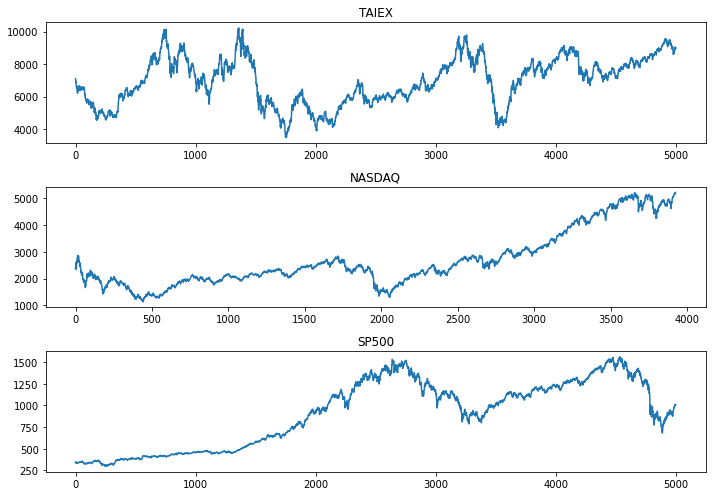

In [ ]:
from pyFTS.data import TAIEX, NASDAQ, SP500

datasets = {}

datasets['TAIEX'] = TAIEX.get_data()[:5000]
datasets['NASDAQ'] = NASDAQ.get_data()[:5000]
datasets['SP500'] = SP500.get_data()[10000:15000]

fig, ax = plt.subplots(nrows=3, ncols=1,figsize=[10,7])

for ct, (dataset_name, dataset) in enumerate(datasets.items()):
  ax[ct].plot(dataset)
  ax[ct].set_title(dataset_name)

plt.tight_layout()


## PWFTS Grid Search

### Point Analysis

#### Batch experiment execution

**CAUTION**: This is a computationally expensive and time consuming task. We strongly recommend run this task using a [Dispy Cluster](http://dispy.sourceforge.net/).

In [ ]:
!pip install dispy
from pyFTS.models import pwfts

for dataset_name, dataset in datasets.items():
    bchmk.sliding_window_benchmarks(dataset, 1000, train=0.8, inc=0.2,
                                    methods=[pwfts.ProbabilisticWeightedFTS],
                                    benchmark_models=False,
                                    transformations=[None],
                                    orders=[1, 2, 3],
                                    partitions=np.arange(10, 80, 5),
                                    progress=False, type='point',
                                    distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                    file="experiments.db", dataset=dataset_name,
                                    tag="gridsearch")


2021-12-06 23:50:30 pycos - version 4.12.1 (Python 3.7.12) with epoll I/O notifier
2021-12-06 23:50:30 dispy - dispy client version: 4.15.0 (Python 3.7.12)
2021-12-06 23:50:30 dispy - Storing fault recovery information in "_dispy_20211206235030"
2021-12-06 23:50:30 dispy - dispy client at 172.28.0.2:9700
2021-12-06 23:50:30 dispy - Started HTTP server at ('0.0.0.0', 8181)


In [ ]:
from pyFTS.benchmarks import Util as bUtil

rmse = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'gridsearch' and model='PWFTS' and measure = 'rmse'")

rmse['Partitions'] = [int.from_bytes(k, "little") for k in rmse['Partitions'].values]

rmse.head()


In [ ]:
import seaborn as sns

orders = rmse['Order'].unique()

fig, ax = plt.subplots(nrows=len(orders), ncols=1, figsize=[10,2*len(orders)])

for co, order in enumerate(orders):
  
    df = rmse[(rmse['Order']==order)]

    g1 = sns.boxplot(x='Partitions', y='Value', hue='Dataset', data=df, showfliers=False, 
                     ax=ax[co], 
                     palette="Set3")
    g1.legend(handles=None)
    ax[co].set_ylabel("Order = {}".format(order))
    ax[co].set_xlabel("Partitions")

    #box = g1.get_position()
    #g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
    #g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)

    plt.tight_layout()

### Interval Analysis

#### Batch experiment execution

**CAUTION**: This is a computationally expensive and time consuming task. We strongly recommend run this task using a [Dispy Cluster](http://dispy.sourceforge.net/).

In [ ]:
for dataset_name, dataset in datasets.items():
    bchmk.sliding_window_benchmarks2(dataset, 1000, train=0.8, inc=0.2,
                                    methods=[pwfts.ProbabilisticWeightedFTS],
                                    benchmark_models=False,
                                    transformations=[None],
                                    orders=[1, 2, 3],
                                    partitions=np.arange(10, 80, 5),
                                    progress=False, type='point',
                                    distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                    file="experiments.db", dataset=dataset_name,
                                    tag="gridsearch")


#### Plots

In [ ]:
from pyFTS.benchmarks import Util as bUtil

wk05 = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'gridsearch' and model='PWFTS' and measure = 'winkler05'")
wk25 = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'gridsearch' and model='PWFTS' and measure = 'winkler25'")

wk05['Partitions'] = [int.from_bytes(k, "little") for k in wk05['Partitions'].values]
wk25['Partitions'] = [int.from_bytes(k, "little") for k in wk25['Partitions'].values]

wk05.head()


In [ ]:
import seaborn as sns

orders = wk05['Order'].unique()

fig, ax = plt.subplots(nrows=len(orders), ncols=2, figsize=[15,3*len(orders)])

for co, order in enumerate(orders):
  
  df = wk05[(wk05['Order']==order)]

  g1 = sns.boxplot(x='Partitions', y='Value', hue='Dataset', data=df, showfliers=False, 
                   ax=ax[co][0], 
                   palette="Set3")
  ax[co][0].set_title("Winkler Score for $\\alpha=.05$")
  ax[co][0].set_ylabel("Order = {}".format(order))
  ax[co][0].set_xlabel("Partitions")
  
  df = wk25[(wk25['Order']==order)]

  g1 = sns.boxplot(x='Partitions', y='Value', hue='Dataset', data=df, showfliers=False, 
                   ax=ax[co][1], 
                   palette="Set3")
  box = g1.get_position()
  g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
  g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
  ax[co][1].set_title("Winkler Score for $\\alpha=.25$")
  ax[co][1].set_ylabel("Order = {}".format(order))
  ax[co][1].set_xlabel("Partitions")

plt.tight_layout()

In [ ]:
from sklearn import preprocessing

fig = plt.figure(figsize=[10,10])

nplots = len(datasets.keys())

for ct, dataset in enumerate(datasets.keys()):

  df = bUtil.get_dataframe_from_bd("experiments.db","tag = 'gridsearch' " 
                                    +" and dataset = '{}' and Model='PWFTS' and measure = 'winkler25'".format(dataset))

  df['Partitions'] = [int.from_bytes(k, "little") for k in df['Partitions'].values]
  
  min_max_scaler = preprocessing.MinMaxScaler()

  df['Value'] = min_max_scaler.fit_transform([[k] for k in df['Value'].values]).flatten()


  ax = fig.add_subplot(nplots, 1, ct+1, projection='3d')
  ax.plot_trisurf(df['Order'].values, df['Partitions'].values, df['Value'].values, cmap="summer", linewidth=0.2, antialiased=True)
  ax.view_init(30,45)
  ax.set_title(dataset) #"Error surface by order and number of partitions")
  ax.set_xlabel("Order")
  ax.set_xticks([1,2,3])
  ax.set_ylabel("Partitions")
  ax.set_zlabel("Winkler $\\alpha=.25$")
#ax.set_zlim([0,1])
#plt.tight_layout()
plt.show()


### Probabilistic Analysis

#### Batch Experiment Execution

**CAUTION**: This is a computationally expensive and time consuming task. We strongly recommend run this task using a [Dispy Cluster](http://dispy.sourceforge.net/).

In [ ]:
for dataset_name, dataset in datasets.items():
    bchmk.sliding_window_benchmarks2(dataset, 1000, train=0.8, inc=0.2,
                                    methods=[pwfts.ProbabilisticWeightedFTS],
                                    benchmark_models=False,
                                    transformations=[None],
                                    orders=[1, 2, 3],
                                    partitions=np.arange(10, 80, 5),
                                    progress=False, type='distribution',
                                    distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                    file="experiments.db", dataset=dataset_name,
                                    tag="gridsearch")


#### Plots

In [ ]:
from pyFTS.benchmarks import Util as bUtil

crps = bUtil.get_dataframe_from_bd("experiments.db", "tag = 'gridsearch' and model like 'PWFTS' and measure = 'crps'")

crps['Partitions'] = [int.from_bytes(k, "little") for k in crps['Partitions'].values]

crps.head()


In [ ]:
fig, ax = plt.subplots(nrows=len(orders), ncols=1, figsize=[10,2*len(orders)])

for co, order in enumerate(orders):
  
  df = crps[(crps['Order']==order)]

  g1 = sns.boxplot(x='Partitions', y='Value', hue='Dataset', data=df, showfliers=False, 
                   ax=ax[co], 
                   palette="Set3")
  box = g1.get_position()
  g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
  g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
  ax[co].set_title("CRPS")
  ax[co].set_ylabel("Order = {}".format(order))
  ax[co].set_xlabel("Partitions")

plt.tight_layout()

## Experiments

### Point

#### Batch experiment execution

**CAUTION**: This is a computationally expensive and time consuming task. We strongly recommend run this task using a [Dispy Cluster](http://dispy.sourceforge.net/).

In [ ]:
competitor_methods = []
competitor_methods.extend([arima.ARIMA]*3)
competitor_methods.extend([quantreg.QuantileRegression]*2)
competitor_methods.extend([BSTS.ARIMA]*3)
competitor_methods.extend([knn.KNearestNeighbors]*2)

competitor_methods_parameters = [
    {'order': (1, 0, 0)},
    {'order': (1, 0, 1)},
    {'order': (2, 0, 0)},
    {'order': 1, 'alpha': .5},
    {'order': 2, 'alpha': .5},
    {'order': (1, 0, 0)},
    {'order': (1, 0, 1)},
    {'order': (2, 0, 0)},
    {'order': 1},
    {'order': 2}
]

proposed_methods = [
    hofts.HighOrderFTS, hofts.WeightedHighOrderFTS, pwfts.ProbabilisticWeightedFTS
]
proposed_methods_parameters=[
    {},{},{}
]

for dataset_name, dataset in datasets.items():
    bchmk.sliding_window_benchmarks2(dataset, 1000, train=0.8, inc=0.2,
                                     benchmark_models=True,
                                     benchmark_methods=competitor_methods,
                                     benchmark_methods_parameters=competitor_methods_parameters,
                                     methods=proposed_methods,
                                     methods_parameters=proposed_methods_parameters,
                                    orders=[1],
                                    partitions=[35],
                                    steps_ahead=[10],
                                    progress=False, type='point',
                                    distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                    file="experiments.db", dataset=dataset_name,
                                    tag="experiments")

#### Result Table

In [ ]:
from pyFTS.benchmarks import Util as bUtil, Tests

df = bUtil.simple_synthetic_dataframe("experiments.db", "experiments", "rmse", 'Steps = 0 and Value < 5000')
tests = Tests.format_experiment_table(df,csv=False, std=False,
        exclude=['.25', '(1,0,0)','(2,0,0)','(2)'], 
                 replace={'ARIMA(1,0,1)-0.05': 'ARIMA',
                         'QAR(1)-0.5':'QAR',
                          'kNN(1)-0.05':'kNN',
                         'EnsembleFTS-.05': 'EnsembleFTS',
                         'BSTS(1,0,1)-0.05': 'BSTS'})

#print(tests.to_latex())
tests

#### Mean Equality Test

In [ ]:
from pyFTS.benchmarks import Util as bUtil, Tests

ranks,post_hoc = Tests.test_mean_equality(tests, alpha=.05)
print(ranks.to_latex())
#ranks

#### Post Hoc Test

In [ ]:
from pyFTS.benchmarks import Util as bUtil, Tests

tests = Tests.post_hoc_tests(post_hoc,'PWFTS', alpha=.05)

print(tests.to_latex())
#tests

#### Many steps ahead accuracy

In [ ]:
from pyFTS.benchmarks import Util as bUtil

sql = "tag = 'experiments' and steps in (0, 2, 4, 6) and "+ \
"  measure = 'rmse' and Value < 5000"

rmse = bUtil.get_dataframe_from_bd("experiments.db", sql.format(a='05'))

rmse.head()

In [ ]:

datasets = rmse['Dataset'].unique()

models = ['PWFTS', 'HOFTS', 'WHOFTS',
          'QAR(1)-0.5', 'ARIMA(1,0,1)-0.05', 'BSTS(1,0,1)-0.05','kNN(1)-0.05',
         ]
names = ['PWFTS', 'HOFTS', 'WHOFTS', 'QAR', 'ARIMA', 'BSTS','kNN',]

lm = len(models)
ld = len(datasets)

import seaborn as sns
fig, ax = plt.subplots(nrows=lm, ncols=1, figsize=[3*ld,2*lm])

for cm, model in enumerate(models):
    df = rmse[(rmse['Model']==model)]
    
    g1 = sns.boxplot(x='Steps', y='Value', hue='Dataset', data=df, showfliers=False, 
                     ax=ax[cm], 
                 palette="Set3")
    ax[cm].set_ylabel("RMSE")
    ax[cm].set_title("{}".format(names[cm]))
    
    box = g1.get_position()
    g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
    g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
    

plt.tight_layout()

#### Residual Analysis

In [ ]:
from pyFTS.models import pwfts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import ResidualAnalysis

train = datasets['SP500'][2000:2800]
test = datasets['SP500'][2800:3000]

fs = Grid.GridPartitioner(data=train, npart=55)
    
model = pwfts.ProbabilisticWeightedFTS(partitioner=fs, order=1)
model.fit(train)
forecasts = model.predict(test)
res = ResidualAnalysis.residuals(test, forecasts, order=model.order)

ResidualAnalysis.single_plot_residuals(res,order=1)



In [ ]:
ljung_box_test = ResidualAnalysis.ljung_box_test(res,alpha=0.05)

print(ljung_box_test.to_latex())
#ljung_box_test

In [ ]:
from pyFTS.common import Util as cUtil
from pyFTS.models import pwfts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import ResidualAnalysis


res = {}

for dataset_name, dataset in datasets.items():
  res[dataset_name] = []
  
  for ct, train, test in cUtil.sliding_window(dataset, 1000, .9, inc=.5):
    
    fs = Grid.GridPartitioner(data=train, npart=35)
    
    model = pwfts.ProbabilisticWeightedFTS(partitioner=fs, order=1)
    model.fit(train)
    forecasts = model.predict(test)
    res[dataset_name].extend(
        ResidualAnalysis.residuals(test, forecasts, order=model.order)
    )

    

In [ ]:
from pyFTS.benchmarks import ResidualAnalysis

ResidualAnalysis.single_plot_residuals(res['TAIEX'],order=1)

In [ ]:
from pyFTS.benchmarks import ResidualAnalysis

ljung_box_test = ResidualAnalysis.ljung_box_test(res['TAIEX'],alpha=0.05)
ljung_box_test
#print(ljung_box_test.to_latex())

### Interval

#### Batch experiment execution

**CAUTION**: This is a computationally expensive and time consuming task. We strongly recommend run this task using a [Dispy Cluster](http://dispy.sourceforge.net/).

In [ ]:
from pyFTS.benchmarks import arima, quantreg, BSTS, knn
from pyFTS.models import ifts, hofts
from pyFTS.ensemble import ensemble

competitor_methods = []
competitor_methods.extend([arima.ARIMA]*6)
competitor_methods.extend([quantreg.QuantileRegression]*4)
competitor_methods.extend([BSTS.ARIMA]*6)
competitor_methods.extend([knn.KNearestNeighbors]*4)


competitor_methods_parameters = [
    {'order':(1,0,0), 'alpha':.05},
    {'order':(1,0,0), 'alpha':.25},
    {'order':(1,0,1), 'alpha':.05},
    {'order':(1,0,1), 'alpha':.25},
    {'order':(2,0,0), 'alpha':.05},
    {'order':(2,0,0), 'alpha':.25},
    {'order':1, 'alpha':.05},
    {'order':1, 'alpha':.25},
    {'order':2, 'alpha':.05},
    {'order':2, 'alpha':.25},
    {'order': (1, 0, 0), 'alpha': .05},
    {'order': (1, 0, 0), 'alpha': .25},
    {'order': (1, 0, 1), 'alpha': .05},
    {'order': (1, 0, 1), 'alpha': .25},
    {'order': (2, 0, 0), 'alpha': .05},
    {'order': (2, 0, 0), 'alpha': .25},
    {'order': 1, 'alpha': .05},
    {'order': 1, 'alpha': .25}
    {'order': 2, 'alpha': .05},
    {'order': 2, 'alpha': .25}
]

proposed_methods = [
    pwfts.ProbabilisticWeightedFTS,
    ifts.IntervalFTS, ifts.WeightedIntervalFTS, 
    ensemble.SimpleEnsembleFTS, ensemble.SimpleEnsembleFTS
]

proposed_methods_parameters=[
    {}, {},{},
    {'name': 'EnsembleFTS', 'alpha':.05, 'fts_method': hofts.WeightedHighOrderFTS, 'partitions': np.arange(20,50,5)},
    {'name': 'EnsembleFTS', 'alpha':.25, 'fts_method': hofts.WeightedHighOrderFTS, 'partitions': np.arange(20,50,5)}
]

for dataset_name, dataset in datasets.items():
    bchmk.sliding_window_benchmarks2(dataset, 1000, train=0.8, inc=0.2,
                                     benchmark_models=True,
                                     benchmark_methods=competitor_methods,
                                     benchmark_methods_parameters=competitor_methods_parameters,
                                     methods=proposed_methods,
                                     methods_parameters=proposed_methods_parameters,
                                     transformations=[None],
                                     orders=[1],
                                     steps_ahead=[10],
                                     partitions=[45],
                                     type='interval',
                                     distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                     file="experiments.db", dataset=dataset_name, tag="experiments")

#### Result Table

In [ ]:
from pyFTS.benchmarks import Util as bUtil, Tests

df = bUtil.simple_synthetic_dataframe("experiments.db", "experiments", "winkler05", 'Steps = 0 and Value < 5000')
tests = Tests.format_experiment_table(df,csv=False, std=False,
        exclude=['.25', '(1,0,0)','(2,0,0)','(2)'], 
                 replace={'ARIMA(1,0,1)-0.05': 'ARIMA',
                         'QAR(1)-0.05':'QAR',
                          'kNN(1)-0.05':'kNN',
                         'EnsembleFTS-.05': 'EnsembleFTS',
                         'BSTS(1,0,1)-0.05': 'BSTS'})

#print(tests.to_latex())
tests

#### Mean Equality Test

In [ ]:
from pyFTS.benchmarks import Util as bUtil, Tests

ranks,post_hoc = Tests.test_mean_equality(tests)
#print(ranks.to_latex())
ranks

#### Post-Hoc Tests

In [ ]:
from pyFTS.benchmarks import Util as bUtil, Tests

tests = Tests.post_hoc_tests(post_hoc,'PWFTS')

#print(tests.to_latex())
tests

#### Many Steps Ahead Accuracy

In [ ]:
from pyFTS.benchmarks import Util as bUtil

sql = "tag = 'experiments' and steps in (0, 2, 4, 6) and "+ \
" (Model like '%{a}' or Model in ('PWFTS')) and measure = 'winkler{a}' and Value < 5000"

wk05 = bUtil.get_dataframe_from_bd("experiments.db", sql.format(a='05'))
wk25 = bUtil.get_dataframe_from_bd("experiments.db", sql.format(a='25'))

wk05.head()

In [ ]:

datasets = wk05['Dataset'].unique()
#models = wk05['Model'].unique()

models = ['PWFTS','EnsembleFTS-.05',
          'QAR(1)-0.05', 'ARIMA(1,0,1)-0.05', 'BSTS(1,0,1)-0.05','kNN(1)-0.05',
         ]
names = ['PWFTS','EnsembleFTS','QAR', 'ARIMA', 'BSTS','kNN',]

lm = len(models)
ld = len(datasets)

import seaborn as sns
#fig, ax = plt.subplots(nrows=lm, ncols=1, figsize=[3*ld,2*lm])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,3])


#for cm, model in enumerate(models):
for cm, model in enumerate(['PWFTS']):
  #for cd, dataset in enumerate(datasets):
    df = wk05[(wk05['Model']==model)]
    
    g1 = sns.boxplot(x='Steps', y='Value', hue='Dataset', data=df, showfliers=False, 
                     ax=ax, 
                 palette="Set3")
    ax.set_ylabel("Winkler Sc.")
    ax.set_title("{}".format(names[cm]))
    
    box = g1.get_position()
    g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
    g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
    

plt.tight_layout()

### Probabilistic

#### Batch experiment execution

**CAUTION**: This is a computationally expensive and time consuming task. We strongly recommend run this task using a [Dispy Cluster](http://dispy.sourceforge.net/).

In [ ]:
competitor_methods = []
competitor_methods.extend([arima.ARIMA]*3)
competitor_methods.extend([quantreg.QuantileRegression]*2)
competitor_methods.extend([BSTS.ARIMA]*3)
competitor_methods.extend([knn.KNearestNeighbors]*2)

competitor_methods_parameters = [
    {'order': (1, 0, 0)},
    {'order': (1, 0, 1)},
    {'order': (2, 0, 0)},
    {'order': 1, 'dist': True},
    {'order': 2, 'dist': True},
    {'order': (1, 0, 0)},
    {'order': (1, 0, 1)},
    {'order': (2, 0, 0)},
    {'order': 1},
    {'order': 2}
]

proposed_methods = [
    hofts.HighOrderFTS, hofts.WeightedHighOrderFTS, pwfts.ProbabilisticWeightedFTS,
    ensemble.SimpleEnsembleFTS
]
proposed_methods_parameters=[
    {},{},{},
    {'name': 'EnsembleFTS', 'fts_method': hofts.WeightedHighOrderFTS, 'partitions': np.arange(20,50,5)}
]

for dataset_name, dataset in datasets.items():
    bchmk.sliding_window_benchmarks2(dataset, 1000, train=0.8, inc=0.2,
                                     benchmark_models=True,
                                     benchmark_methods=competitor_methods,
                                     benchmark_methods_parameters=competitor_methods_parameters,
                                     methods=proposed_methods,
                                     methods_parameters=proposed_methods_parameters,
                                    orders=[1],
                                    partitions=[35],
                                    steps_ahead=[10],
                                    progress=False, type='distribution',
                                    distributed=True, nodes=['192.168.0.110', '192.168.0.107','192.168.0.106'],
                                    file="experiments.db", dataset=dataset_name,
                                    tag="experiments")

#### Result Table

In [ ]:
from pyFTS.benchmarks import Util as bUtil, Tests

df = bUtil.simple_synthetic_dataframe("experiments.db", "experiments", "crps", "Steps = 0 and Value < 5000")
tests = Tests.format_experiment_table(df,csv=False, std=False,
        exclude=['.25', '(1,0,0)','(2,0,0)','(2)'], 
                 replace={'ARIMA(1,0,1)-0.05': 'ARIMA',
                         'QAR(1)-0.05':'QAR',
                          'kNN(1)-0.05':'kNN',
                         'EnsembleFTS-.05': 'EnsembleFTS',
                         'BSTS(1,0,1)-0.05': 'BSTS'})

tests
#print(tests.to_latex())

#### Mean Equality Test

In [ ]:
from pyFTS.benchmarks import Util as bUtil, Tests

ranks,post_hoc = Tests.test_mean_equality(tests)
#print(ranks.to_latex())
ranks

#### Post Hoc Tests

In [ ]:
from pyFTS.benchmarks import Util as bUtil, Tests

tests = Tests.post_hoc_tests(post_hoc,'PWFTS')

#print(tests.to_latex())
tests

#### Many Steps Ahead Accuracy

In [ ]:
from pyFTS.benchmarks import Util as bUtil

sql = "tag = 'experiments' and steps in (0, 2, 4, 6) and "+ \
" measure = 'crps' and Value < 5000"

crps = bUtil.get_dataframe_from_bd("experiments.db", sql)

crps.head()

In [ ]:
crps['Model'].unique()

In [ ]:

datasets = crps['Dataset'].unique()

models = ['PWFTS', 'EnsembleFTS',
          'QAR(1)-0.05', 'ARIMA(1,0,1)-0.05', 'BSTS(1,0,1)-0.05','kNN(1)-0.05',
         ]
names = ['PWFTS','EnsembleFTS','QAR', 'ARIMA', 'BSTS','kNN',]

lm = len(models)
ld = len(datasets)

import seaborn as sns
#fig, ax = plt.subplots(nrows=lm, ncols=1, figsize=[3*ld,2*lm])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,3])


#for cm, model in enumerate(models):
for cm, model in enumerate(['PWFTS']):
  #for cd, dataset in enumerate(datasets):
    df = crps[(crps['Model']==model)]
    
    g1 = sns.boxplot(x='Steps', y='Value', hue='Dataset', data=df, showfliers=False, 
                     ax=ax, 
                 palette="Set3")
    ax.set_ylabel("CRPS.")
    ax.set_title("{}".format(names[cm]))
    
    box = g1.get_position()
    g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
    g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
    

plt.tight_layout()

## Samples

In [ ]:
from pyFTS.data import TAIEX, NASDAQ, SP500
from pyFTS.common import Util

train = TAIEX.get_data()[1000:1800]
test = TAIEX.get_data()[1800:2000]


### One Step Ahead

In [ ]:
from pyFTS.models import pwfts
from pyFTS.partitioners import Grid

fs = Grid.GridPartitioner(data=train, npart=45)

model = pwfts.ProbabilisticWeightedFTS(partitioner=fs, order=1)
model.fit(train)

In [ ]:
forecasts = model.predict(test[:20], type='point')
intervals = model.predict(test[:20], type='interval')
distributions = model.predict(test[:20], type='distribution')

forecasts.insert(0,test[0])
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])
ax.plot(test[:21], label='Original',color='black')
ax.plot(forecasts[:-1], label='Point',color='brown')
Util.plot_interval2(intervals, test[:10], start_at=model.order-1, ax=ax, color='orange', ls='--', label='Interval')
Util.plot_distribution2(distributions, test[:10], start_at=model.order-1, ax=ax, cmap="Blues")

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, 
          fancybox=True, shadow=True, ncol=5, loc='lower center', bbox_to_anchor=(0.5, -0.05))

In [ ]:
Util.plot_distribution_tiled(distributions,rows=5,cols=3,size=[10,10])

### Many Steps Ahead 

In [ ]:
horizon=10

forecasts = model.predict(test[9:20], type='point', steps_ahead=horizon)
intervals = model.predict(test[9:20], type='interval', steps_ahead=horizon)
distributions = model.predict(test[9:20], type='distribution', steps_ahead=horizon)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])
ax.plot(test[:20], label='Original',color='black')
for k in range(9):
  forecasts.insert(0,None)
forecasts.insert(9,test[9])
ax.plot(forecasts, label='Point',color='brown')
Util.plot_interval2(intervals, test[:20], start_at=9, ax=ax, color='red', ls='--', label='WIFTS')
Util.plot_distribution2(distributions, test[:20], start_at=9, ax=ax, cmap="Blues")

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, 
          fancybox=True, shadow=True, ncol=5, loc='lower center', bbox_to_anchor=(0.5, -0.05))


In [ ]:
Util.plot_distribution_tiled(distributions,rows=5,cols=2,size=[10,7])